# TCP vs. UDP Comparison

## Introduction
TCP and UDP are two of the most commonly used transport layer protocols for transmitting data over networks. Each protocol serves different purposes and is optimized for different types of applications. In this notebook, we will compare TCP and UDP based on various parameters such as latency, throughput, and packet loss.

## TCP (Transmission Control Protocol)
TCP is a connection-oriented protocol that ensures reliable data delivery. It establishes a connection before transmitting data and maintains this connection throughout the communication session. TCP guarantees that all packets arrive at the destination in the correct order, and it retransmits any lost packets. It provides essential features such as:
- **Error-checking**: Ensures that corrupted data is detected and retransmitted.
- **Flow control**: Prevents overwhelming the receiver by adjusting the data transmission rate.
- **Congestion control**: Adapts the transmission rate based on network conditions to avoid congestion.

Because of its reliability, TCP is used for applications such as web browsing (HTTP/HTTPS), email (SMTP, IMAP, POP3), and file transfers (FTP).

## UDP (User Datagram Protocol)
UDP is a connectionless protocol that focuses on speed rather than reliability. Unlike TCP, it does not establish a dedicated connection before sending data, nor does it guarantee that packets arrive at their destination. It lacks mechanisms for:
- **Error-checking**: Corrupted or lost packets are not retransmitted.
- **Flow control**: Data is sent without considering the receiver’s capacity.
- **Congestion control**: No adaptation to network congestion.

Because of its minimal overhead, UDP is used for applications where real-time performance is more important than reliability, such as VoIP (Voice over IP), online gaming, live video streaming, and DNS lookups.

## Comparison of TCP and UDP
| Feature             | TCP                                      | UDP                              |
|---------------------|----------------------------------------|----------------------------------|
| **Connection**      | Connection-oriented                    | Connectionless                   |
| **Reliability**     | Reliable (ensures all data arrives)   | Unreliable (packets may be lost) |
| **Error-checking**  | Yes (corrupted packets are resent)    | No                               |
| **Flow control**    | Yes (adjusts sending rate)            | No                               |
| **Congestion control** | Yes (reduces network congestion)  | No                               |
| **Ordering**        | Yes (packets arrive in order)         | No (packets may arrive out of order) |
| **Header Size**     | Larger (20+ bytes)                    | Smaller (8 bytes)                |
| **Speed**          | Slower due to reliability overhead     | Faster due to minimal overhead  |
| **Best Used For**   | Web browsing, emails, file transfers  | VoIP, gaming, live streaming    |

## Testing and Plotting Results

To analyze the differences between TCP and UDP, we conducted a series of tests using client-server programs written in Python. These programs measured key performance metrics, including:
- **Latency:** The time taken for a message to travel from client to server and back.
- **Throughput:** The number of messages successfully sent per second.
- **Packet Loss (UDP only):** The percentage of lost messages due to the lack of retransmissions.

### How to Run the Tests

To generate the necessary test data, follow these steps:

1. **Run the TCP and UDP tests as described in the [README.md](README.md) file.**  
   - Start the TCP and UDP servers in separate terminal windows.
   - Run the corresponding clients to send messages and record network performance.
   - The logs and performance data will be saved in `.txt` and `.csv` files.

2. **After running the tests, return to this notebook to analyze the results.**  
   - This notebook reads the recorded data from `tcp/tcp_performance_log.csv` and `udp/udp_performance_log.csv`.
   - The data is processed and plotted to compare TCP vs. UDP performance visually.

## Next Steps: Data Analysis and Visualization

In the following sections, we will load the test data, process it, and generate comparative plots of TCP and UDP performance. These visualizations will help us better understand their strengths and weaknesses in real-world applications.

## 1. Imports

In [1]:
import matplotlib.pyplot as plt
import csv

## 2. Read CSV files

Reads performance data from a CSV file and returns a dictionary.

Parameters:
- filename (str): Path to the CSV file.
- columns (list): List of column names to extract.

Returns:
- dict: A dictionary containing extracted data.

In [ ]:
def read_csv(filename, columns):
    data = {col: [] for col in columns}
    
    with open(filename, "r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            for i, col in enumerate(columns):
                data[col].append(float(row[i]) if i else int(row[i]))  # Convert first column to int, rest to float

    return data

## 3. Helper function to plot data

Plots a given metric for TCP and UDP performance.

Parameters:
- x (list): X-axis values (number of clients).
- y_values (list of lists): Y-axis values for different data series.
- labels (list): Labels for each data series.
- xlabel (str): Label for X-axis.
- ylabel (str): Label for Y-axis.
- title (str): Title of the plot.
- filename (str): Filename to save the plot.
- colors (list): Colors for each data series.

In [26]:
def plot_metric(x, y_values, labels, xlabel, ylabel, title, filename, colors):
    plt.figure(figsize=(8, 5))
    for y, label, color in zip(y_values, labels, colors):
        plt.plot(x, y, marker="x", linestyle="-", color=color, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

## 4. Define CSV column structures

In [89]:
tcp_columns = ["clients", "throughput", "latency"]
udp_columns = ["clients", "throughput", "latency", "packet_loss"]


## 5. Read performance data

Results of Multiple Clients Test are stored in the following csv files:
- `tcp/tcp_performance_log.csv`
- `udp/udp_performance_log.csv`

Results of single client test with different message sizes are stored in the following csv files:
- `v2/tcp/tcp_performance_log.csv`
- `v2/udp/udp_performance_log.csv`

In [113]:
# String Variable to track if plot is between number of clients or number of messages. If client, then change this to 'Clients' else 'Messages'
x_label = 'Messages'

tcp_data = read_csv("v2/tcp/tcp_performance_log.csv", tcp_columns)
udp_data = read_csv("v2/udp/udp_performance_log.csv", udp_columns)

## 6. Generate plots

### 6.1 Throughput

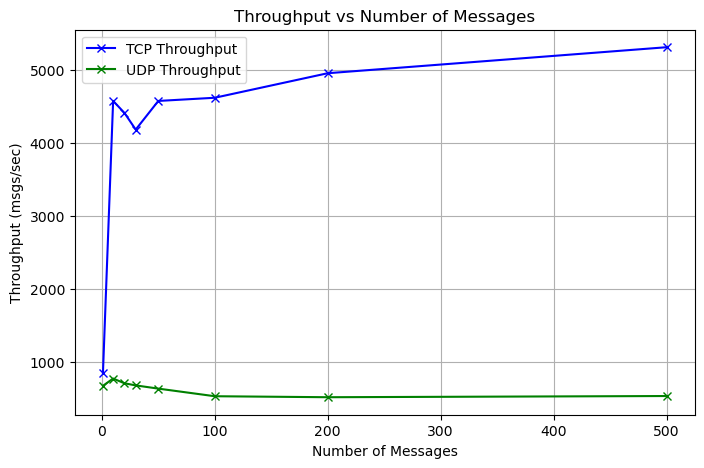

In [114]:

plot_metric(
    x=tcp_data["clients"],
    y_values=[tcp_data["throughput"], udp_data["throughput"]],
    labels=["TCP Throughput", "UDP Throughput"],
    xlabel=f"Number of {x_label}",
    ylabel="Throughput (msgs/sec)",
    title=f"Throughput vs Number of {x_label}",
    filename="throughput_comparison.png",
    colors=["b", "g"]
)


### 6.2 Latency

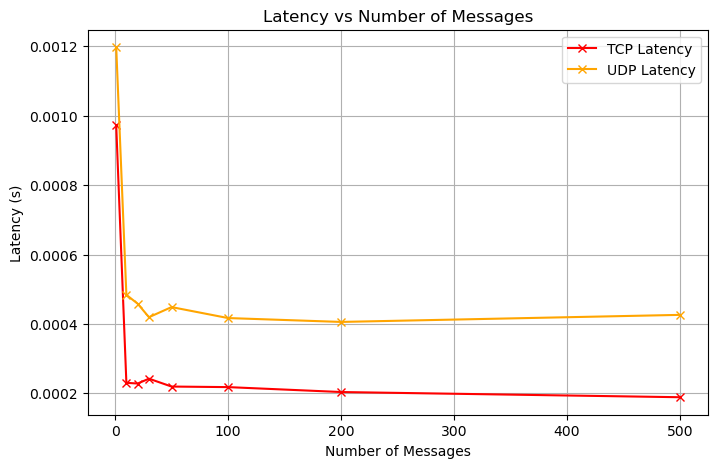

In [115]:
plot_metric(
    x=tcp_data["clients"],
    y_values=[tcp_data["latency"], udp_data["latency"]],
    labels=["TCP Latency", "UDP Latency"],
    xlabel=f"Number of {x_label}",
    ylabel="Latency (s)",
    title=f"Latency vs Number of {x_label}",
    filename="latency_comparison.png",
    colors=["r", "orange"]
)


### 6.3 UDP Packet Loss

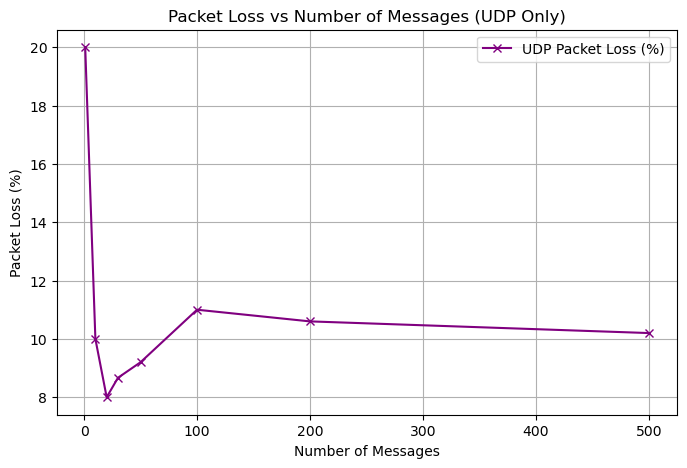

In [116]:
plot_metric(
    x=udp_data["clients"],
    y_values=[udp_data["packet_loss"]],
    labels=["UDP Packet Loss (%)"],
    xlabel=f"Number of {x_label}",
    ylabel="Packet Loss (%)",
    title=f"Packet Loss vs Number of {x_label} (UDP Only)",
    filename="packet_loss_comparison.png",
    colors=["purple"]
)

### **Results and Conclusion**  

After running the tests and analyzing the results, I observed some **unexpected outcomes**:  
- **TCP had higher throughput than UDP.**  
- **TCP had lower latency compared to UDP.**  

This contradicts expectated results, as **UDP is designed to be faster** due to its **lack of connection overhead, acknowledgments, and retransmissions**. However, upon deeper inspection, I found specific reasons within **my implementation** that caused this behavior.  

---

### **Understanding the Unexpected Results**  

1. **UDP is Waiting for Acknowledgments**  
   - In my UDP implementation, the client **sends a message and waits for an acknowledgment from the server** before proceeding.  
   - This behavior **introduces a wait period**, making UDP behave **more like TCP**, where each message exchange requires a response.  
   - In contrast, **TCP’s acknowledgment mechanism is built into the protocol**, making it more efficient in this specific case.  

2. **UDP Timeout Overhead**  
   - I explicitly set a **timeout** in UDP:  
     ```python
     self.socket.settimeout(0.00001)  # 10 microseconds
     ```  
   - This means that **UDP will wait this much time for a response** before deciding that a packet is lost.  
   - If a packet is received within this time, UDP **moves on immediately**, but if no response arrives, it waits **for the entire duration of the timeout** before assuming the packet is lost.  
   - TCP, on the other hand, **does not have this enforced wait period** at the application level, making it appear faster in my tests.  

3. **TCP’s Optimized Flow Control and Batching**  
   - TCP **batches data efficiently** using algorithms like **Nagle’s Algorithm** to optimize network transmission.  
   - It **dynamically adjusts** to network conditions, ensuring a smooth and efficient transfer of data.  
   - In contrast, my UDP implementation **sends individual packets and waits for a response**, introducing **additional overhead** that TCP avoids.  

---

This was just a test setup designed to explore socket programming and gain insights into UDP and TCP behavior. The application-level adjustments, such as explicit timeouts and acknowledgments, were intentionally made for visualization and understanding purposes, rather than to reflect real-world UDP usage, where it is typically used without enforced waiting periods.